# Project 4 - HR Analytics Attrition (Dynamic) 

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
hr = pd.read_csv('Data/HR-Employee-Attrition.csv')
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation: Most of the columns are in the categorical, so now we have to convert those to numeric

In [4]:
# Checking the dtypes
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Missing Values

In [5]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Summary Statstics

In [6]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observation:
    Outliers may present in Age, DailyRate,DistanceFromHome, EmployeeNumber etc because there is more difference in 75% and max

## Correlation

In [7]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


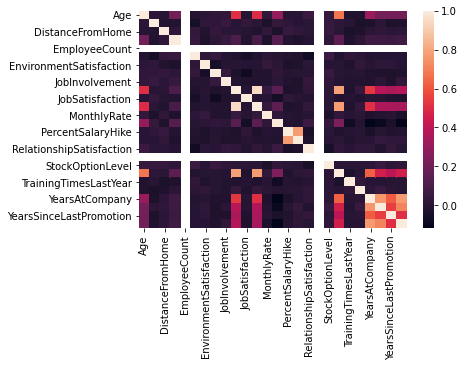

In [8]:
sns.heatmap(hr.corr())

Observation: 
    1. As EmployeeCount, StandardHours and Over18 don't have any correlation with other columns. So dropping those columns
    2. EmployeeNumber dropping as unwanted column

In [9]:
# Dropping the columns whose don't have any correlation and unwanted columns

hr.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis = 1, inplace = True)

## Data Visulaization

### Univarient Analysis

Text(0.5, 0, 'BusinessTravel')

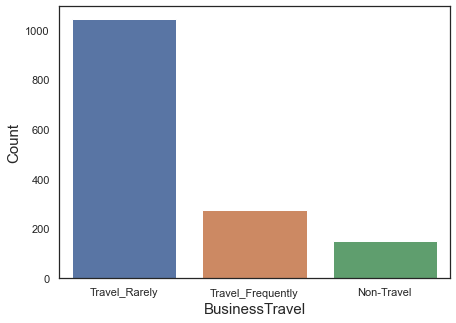

In [10]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[7,5])
sns.set(style='white')
sns.countplot(x = 'BusinessTravel', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('BusinessTravel', fontsize=15)

Observation: Frequency of Travel rarely were more i.e more than 1000 and Non-Travel frequency is near about 150

Text(0.5, 0, 'Department')

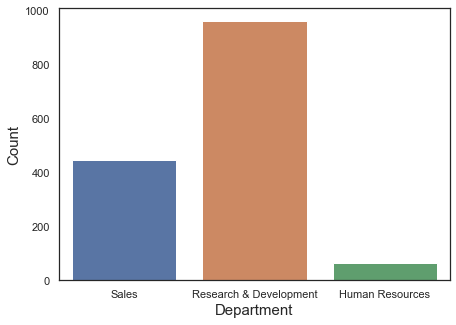

In [11]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[7,5])
sns.set(style='white')
sns.countplot(x = 'Department', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Department', fontsize=15)

Observation: Frequency of R&D were more i.e more than 970 and HR frequency is near about 100

Text(0.5, 0, 'Gender')

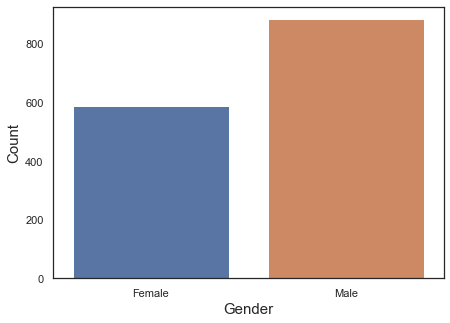

In [12]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[7,5])
sns.set(style='white')
sns.countplot(x = 'Gender', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Gender', fontsize=15)

Observation: Frequency of Male are more i.e more than 800 and Female frequency is near about 590

Text(0.5, 0, 'MaritalStatus')

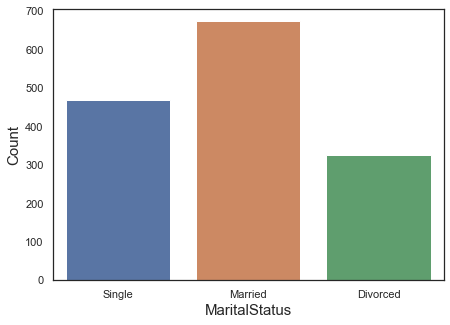

In [13]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[7,5])
sns.set(style='white')
sns.countplot(x = 'MaritalStatus', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('MaritalStatus', fontsize=15)

Observation: Frequency of Married were more i.e more than 660 and Divored frequency is near about 300

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

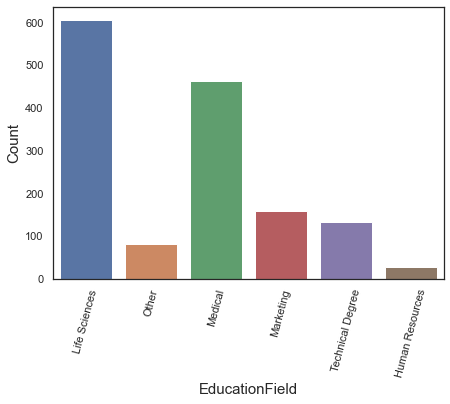

In [14]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[7,5])
sns.set(style='white')
sns.countplot(x = 'EducationField', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('EducationField', fontsize=15)
plt.xticks(rotation=75)

Observation: Frequency of Life Science were more i.e near about 600 and HR frequency is near about 10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

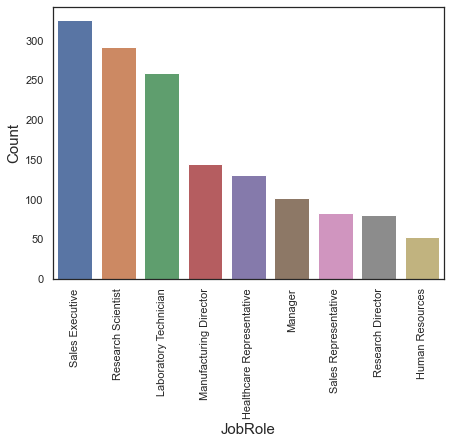

In [15]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[7,5])
sns.set(style='white')
sns.countplot(x = 'JobRole', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('JobRole', fontsize=15)
plt.xticks(rotation=90)

Observation: Frequency of Sales Exscutive were more i.e more than 350 and HR frequency is near about 50

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text major ticklabel objects>)

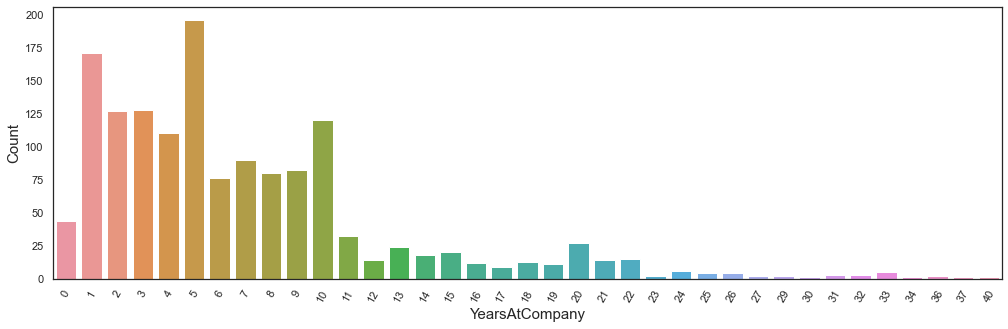

In [16]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[17,5])
sns.set(style='white')
sns.countplot(x = 'YearsAtCompany', data = hr)
plt.ylabel('Count', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize=15)
plt.xticks(rotation=60)

Observation: Frequency of 5 yrs in company are more i.e more than 190 and frequency is near about 1-2 for more than 34 yrs at company

### Bivarient Analysis

Text(0.5, 0, 'Age')

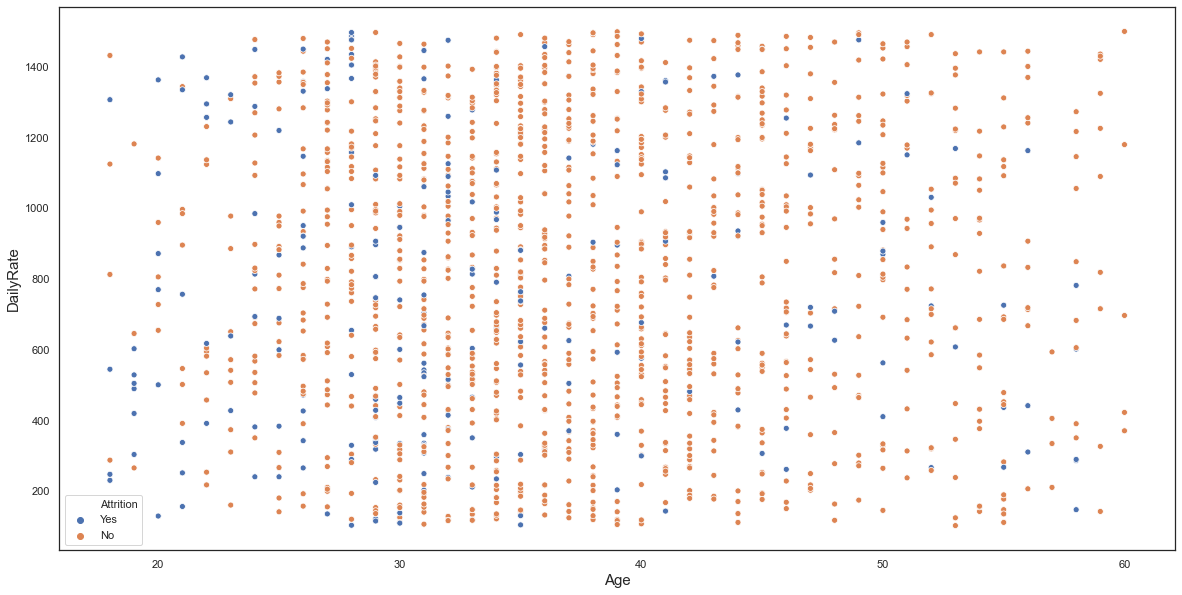

In [17]:
plt.figure(figsize=[20,10])
sns.scatterplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = hr)
plt.ylabel('DailyRate', fontsize=15)
plt.xlabel('Age', fontsize=15)

Observation: 
    1. Age at 35-38, 42,  there is max no attrition with more dailyRate
    2. Daily Rate is more between 28-45 Age and after 45 age daily rate is less

Text(0.5, 0, 'Age')

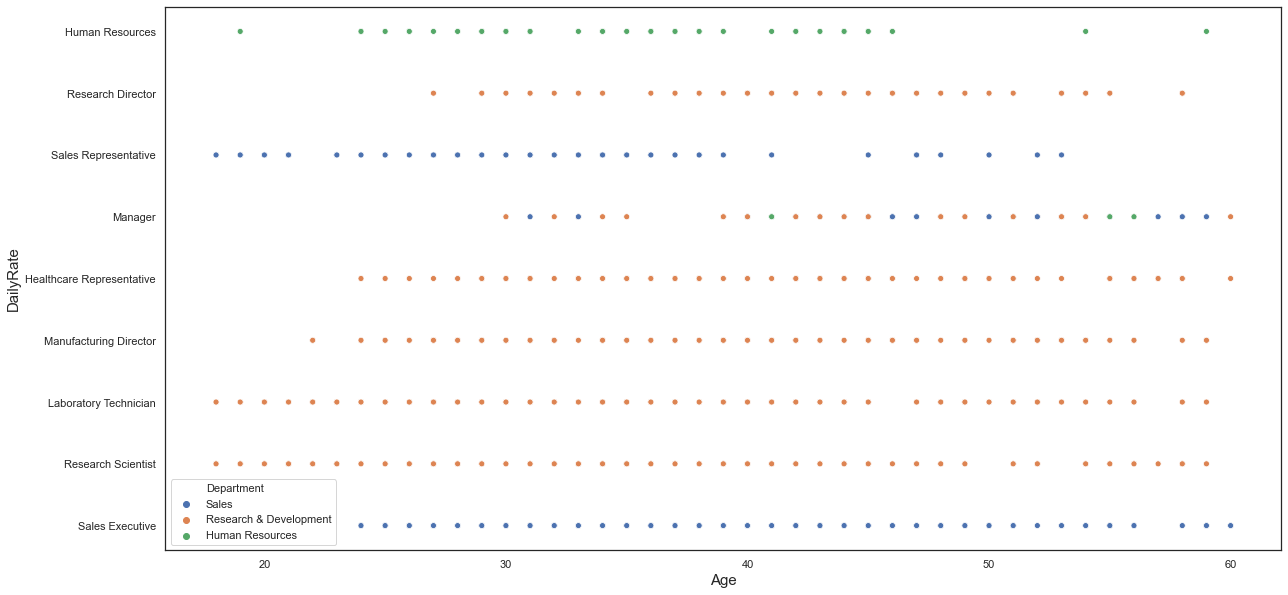

In [18]:
plt.figure(figsize=[20,10])
sns.scatterplot(x = 'Age', y = 'JobRole', hue = 'Department', data = hr)
plt.ylabel('DailyRate', fontsize=15)
plt.xlabel('Age', fontsize=15)

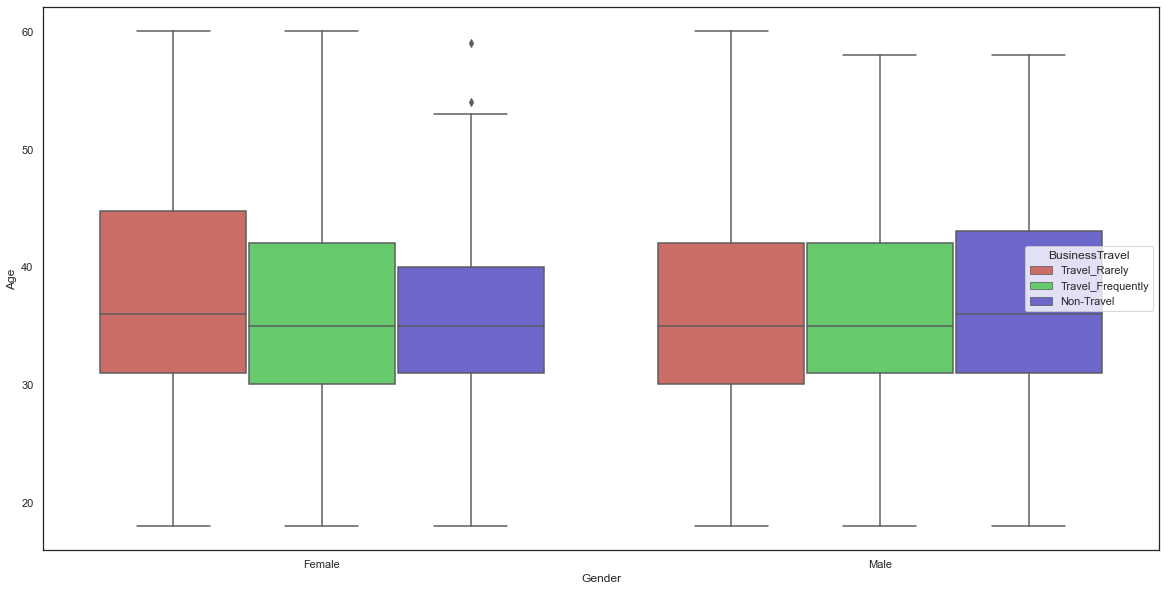

In [19]:
plt.figure(figsize=[20,10])
sns.boxplot(x="Gender",y="Age",hue="BusinessTravel",data=hr,palette="hls")

In [20]:
# Checking the unique keys in categorical

for i in hr.columns:
    if hr[i].dtypes == 'object':
        print('Column name: %s and Unique Keys: %s\n' %(i, hr[i].unique()))

Column name: Attrition and Unique Keys: ['Yes' 'No']

Column name: BusinessTravel and Unique Keys: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column name: Department and Unique Keys: ['Sales' 'Research & Development' 'Human Resources']

Column name: EducationField and Unique Keys: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column name: Gender and Unique Keys: ['Female' 'Male']

Column name: JobRole and Unique Keys: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Column name: MaritalStatus and Unique Keys: ['Single' 'Married' 'Divorced']

Column name: OverTime and Unique Keys: ['Yes' 'No']



In [21]:
# Converting Categorical to Numeric

from sklearn.preprocessing import LabelEncoder

for i in hr.columns:
    if hr[i].dtypes == 'object':
        hr[i] = LabelEncoder().fit_transform(hr[i])

In [22]:
hr['Attrition'].unique()

array([1, 0])

## Plotting Outliers

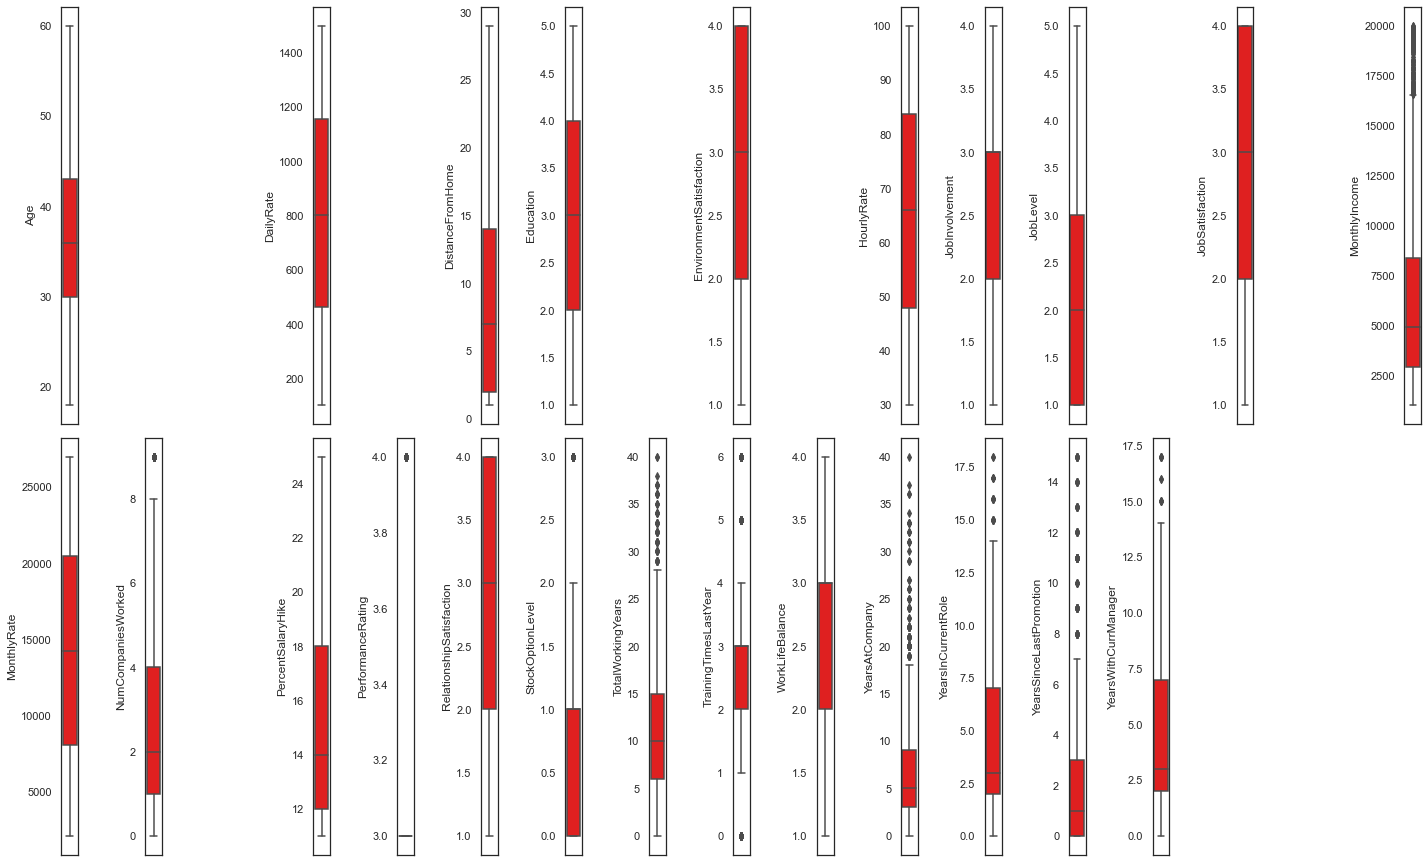

In [23]:
col = hr.columns.values
ncol = 17
nrow = 10

plt.figure(figsize=(20, 60))
for i in range(0, len(col)):
    if col[i] not in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
        plt.subplot(nrow, ncol, i+1)
        sns.boxplot(hr[col[i]], color='red', orient='v')
        plt.tight_layout()

## Distribution of Skewness

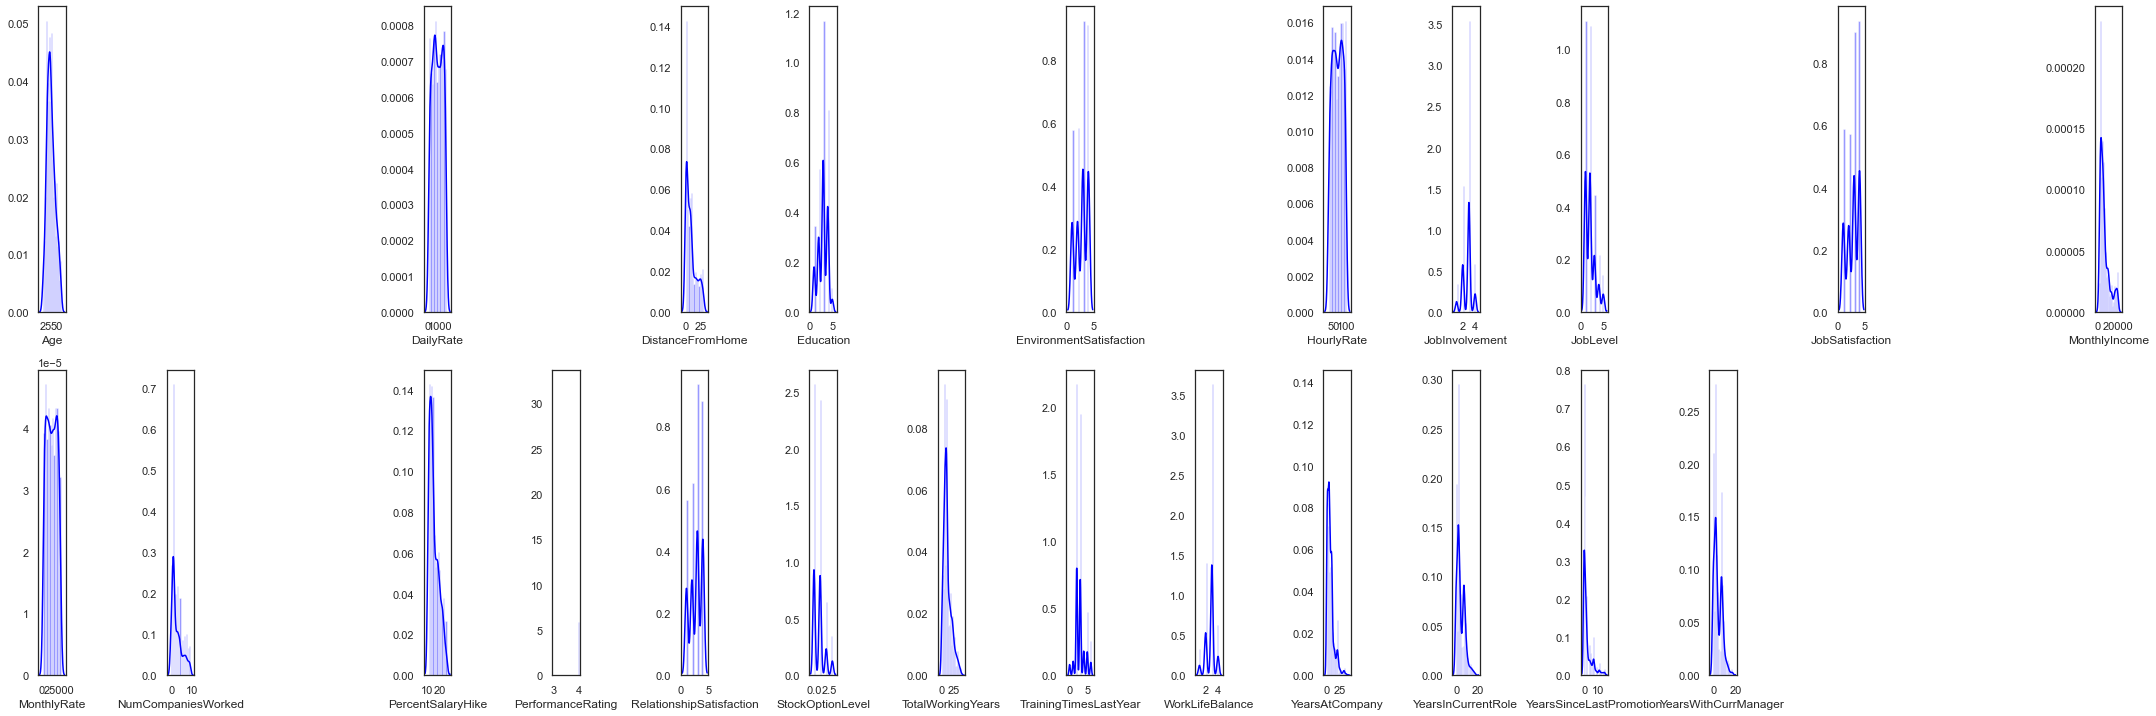

In [24]:
plt.figure(figsize=(30, 50))
for i in range(0, len(col)):
    if col[i] not in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
        plt.subplot(nrow, ncol, i+1)
        sns.distplot(hr[col[i]], color='blue')
        plt.tight_layout()

In [25]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [26]:
hr['Attrition'].unique()

array([1, 0])

In [27]:
# Treating skewness via log method

for i in col:
    if i not in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
        if hr[i].skew()> 0.6:
            hr[i] = np.log1p(hr[i])

In [28]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

## Removing Outliers

In [29]:
# Check the Outliers
from scipy.stats import zscore

# Take without categorical
z_score = abs(zscore(hr))
print(hr.shape)

hr_final = hr.loc[(z_score < 3).all(axis=1)]
print(hr_final.shape)

(1470, 31)
(1459, 31)


## Model Training
Now our data are ready!

According to the data, our Target variable 'Attrition' is discrete, so our model is Classification.

Let's now begin to train out Classification model!

We will need to first split up our data into an X array that contains the features to train on, and y array with the target variable

In [30]:
# Separationg independent & dependent variables

df_x = hr_final.drop(columns=['Attrition'])
df_y = hr_final['Attrition']

In [31]:
# Scaling the input variable

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(df_x)

In [32]:
# Doing PCA : it is decomposition of dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=10)# Coverting the more than 31 columns to 10 
xx = pca.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

max_acc_scr = 0
for r_st in range(30, 42):
    x_train, x_test, y_train, y_test = train_test_split(xx, df_y, test_size = 0.3, random_state = r_st)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    acc_scr = accuracy_score(y_test, y_pred)
    
    if max_acc_scr < acc_scr:
        max_acc_scr = acc_scr
        final_r_st = r_st
print('Max accuracy_score %s according to random state : %s' %(max_acc_scr, r_st))

Max accuracy_score 0.8972602739726028 according to random state : 41


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# Breaking input & target variables

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xx,df_y, test_size=.3, random_state=35)

In [36]:
# Using model via for loop

model = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report : \n', classification_report(y_test, y_pred))
    print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is 0.8540646425073457
Accuracy_score: 0.8538812785388128
Confusion Matrix : 
 [[349  18]
 [ 70   1]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       367
           1       0.05      0.01      0.02        71

    accuracy                           0.80       438
   macro avg       0.44      0.48      0.46       438
weighted avg       0.71      0.80      0.75       438

F1 Score:  85.39

*************** DecisionTreeClassifier() Model ***************

Score of DecisionTreeClassifier() Model is 1.0
Accuracy_score: 0.773972602739726
Confusion Matrix : 
 [[349  18]
 [ 70   1]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       367
           1       0.05      0.01      0.02        71

    accuracy                           0.80       

Observation: **GaussianNB() Model is better because f1_score and accuracy_score is better than other models**

In [37]:
# Cross Validation

from sklearn.model_selection import cross_val_score

model = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, xx, df_y, cv=5, scoring = 'accuracy')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is [0.84246575 0.84589041 0.85958904 0.86643836 0.85223368]
Mean score:  0.853323447723956
Std score :  0.008781635895823483
Min score :  0.8424657534246576
Max score :  0.8664383561643836

*************** DecisionTreeClassifier() Model ***************

Score of DecisionTreeClassifier() Model is [0.79452055 0.78767123 0.79109589 0.77739726 0.81099656]
Mean score:  0.7923362990161464
Std score :  0.0109494543323593
Min score :  0.7773972602739726
Max score :  0.8109965635738832

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is [0.81506849 0.83219178 0.85273973 0.83561644 0.83848797]
Mean score:  0.834820882172951
Std score :  0.012101524468027649
Min score :  0.815068493150685
Max score :  0.8527397260273972

*************** SVC() Model ***************

Score of SVC() Model is [0.83561644 0.85273973 0.84931507 0.84931507 0.85223368]
Mean 

Observation: **LogisticRegression()** scores are better than other model

### AUC ROC

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [39]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
y_pred_prob = lg.predict_proba(x_test)[:, 1] # it can be 1 or 0 that means check the 1's i.e. having attrition in test_x
y_pred_prob

array([0.07770902, 0.27052135, 0.18047165, 0.04305349, 0.26407358,
       0.21803358, 0.0606247 , 0.2293825 , 0.02129247, 0.06669965,
       0.10443905, 0.12637536, 0.03755554, 0.05534011, 0.5289402 ,
       0.04854996, 0.26884499, 0.05653405, 0.1498017 , 0.10838129,
       0.07073828, 0.07142646, 0.06192071, 0.15518955, 0.11556506,
       0.07039676, 0.04578969, 0.08714765, 0.05388703, 0.05751875,
       0.07588735, 0.58131473, 0.30286727, 0.36295862, 0.08976173,
       0.03429374, 0.05475667, 0.0623689 , 0.08443296, 0.16208817,
       0.03001722, 0.10720836, 0.24008429, 0.08667422, 0.03477141,
       0.1243706 , 0.12971955, 0.34200391, 0.08159023, 0.09759551,
       0.05947275, 0.10279743, 0.03496495, 0.51983173, 0.04503177,
       0.05784491, 0.14775983, 0.17354706, 0.188919  , 0.04125707,
       0.03054641, 0.08789939, 0.05211543, 0.24890487, 0.0844727 ,
       0.24017067, 0.27359107, 0.53711185, 0.06436551, 0.10306732,
       0.15229509, 0.43223036, 0.04266164, 0.52266544, 0.04808

In [40]:
# False Positive Rate & True Positive Rate

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [41]:
fpr

array([0.        , 0.        , 0.        , 0.0027248 , 0.0027248 ,
       0.00817439, 0.00817439, 0.01634877, 0.01634877, 0.03814714,
       0.03814714, 0.04359673, 0.04359673, 0.05722071, 0.05722071,
       0.07084469, 0.07084469, 0.07901907, 0.07901907, 0.10081744,
       0.10081744, 0.11716621, 0.11716621, 0.1253406 , 0.1253406 ,
       0.1280654 , 0.1280654 , 0.16076294, 0.16076294, 0.17983651,
       0.17983651, 0.1880109 , 0.1880109 , 0.19073569, 0.19073569,
       0.20163488, 0.20163488, 0.20708447, 0.20708447, 0.22615804,
       0.22615804, 0.27792916, 0.27792916, 0.28610354, 0.28610354,
       0.3133515 , 0.3133515 , 0.32425068, 0.32425068, 0.32970027,
       0.32970027, 0.33787466, 0.33787466, 0.35694823, 0.35694823,
       0.36512262, 0.36512262, 0.36784741, 0.36784741, 0.3760218 ,
       0.3760218 , 0.4386921 , 0.4386921 , 0.46321526, 0.46321526,
       0.51498638, 0.51498638, 0.53405995, 0.53405995, 0.54495913,
       0.54495913, 0.54768392, 0.54768392, 0.55313351, 0.55313

In [42]:
tpr

array([0.        , 0.01408451, 0.09859155, 0.09859155, 0.12676056,
       0.12676056, 0.18309859, 0.18309859, 0.22535211, 0.22535211,
       0.29577465, 0.29577465, 0.30985915, 0.30985915, 0.32394366,
       0.32394366, 0.33802817, 0.33802817, 0.35211268, 0.35211268,
       0.36619718, 0.36619718, 0.38028169, 0.38028169, 0.3943662 ,
       0.3943662 , 0.4084507 , 0.4084507 , 0.43661972, 0.43661972,
       0.46478873, 0.46478873, 0.47887324, 0.47887324, 0.49295775,
       0.49295775, 0.50704225, 0.50704225, 0.52112676, 0.52112676,
       0.53521127, 0.53521127, 0.54929577, 0.54929577, 0.56338028,
       0.56338028, 0.57746479, 0.57746479, 0.5915493 , 0.5915493 ,
       0.6056338 , 0.6056338 , 0.61971831, 0.61971831, 0.63380282,
       0.63380282, 0.66197183, 0.66197183, 0.67605634, 0.67605634,
       0.69014085, 0.69014085, 0.70422535, 0.70422535, 0.71830986,
       0.71830986, 0.74647887, 0.74647887, 0.76056338, 0.76056338,
       0.77464789, 0.77464789, 0.78873239, 0.78873239, 0.80281

In [43]:
thresholds

array([1.68089941, 0.68089941, 0.53711185, 0.5289402 , 0.51983173,
       0.50674191, 0.45843658, 0.43028901, 0.41249589, 0.3893885 ,
       0.36295862, 0.3583827 , 0.35559413, 0.34200391, 0.33653951,
       0.32157564, 0.31615473, 0.30908608, 0.30817223, 0.28257053,
       0.28230089, 0.27186411, 0.27052135, 0.26407358, 0.26396577,
       0.26229164, 0.26105838, 0.2434153 , 0.24179739, 0.2300434 ,
       0.22909128, 0.22667962, 0.22563985, 0.22538141, 0.22088168,
       0.21506338, 0.21457834, 0.21209538, 0.21126647, 0.19779678,
       0.19753315, 0.17629724, 0.17491306, 0.17133082, 0.17098818,
       0.16208817, 0.16173796, 0.15870648, 0.15844932, 0.15705434,
       0.15678239, 0.15518955, 0.1538489 , 0.14905813, 0.14775983,
       0.14467471, 0.1415819 , 0.14155813, 0.14141319, 0.13556235,
       0.13511608, 0.12293708, 0.12244847, 0.11492094, 0.11485686,
       0.10833348, 0.10719458, 0.10306732, 0.10279743, 0.10093644,
       0.10086802, 0.09938541, 0.09845753, 0.09831726, 0.09759

In [44]:
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_prob))

ROC AUC Score:  0.7040718424991366


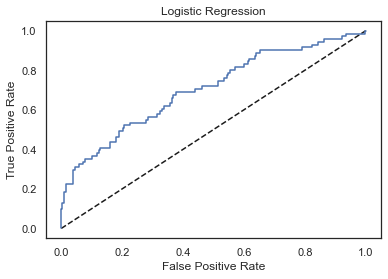

In [45]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [46]:
auc_score = roc_auc_score(y_test, lg.predict(x_test))
print('AUC Score:', auc_score)

AUC Score: 0.5663353417507772


In [47]:
print('Logistic Regression AUC: ', auc(fpr, tpr))

Logistic Regression AUC:  0.7040718424991366


In [48]:
# Ridge model will give the best parameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001,0.01,0.1,1,2,5,10,12,50,100,1000]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [49]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(lg, hyperparameters, cv=5, verbose=0, scoring='accuracy',error_score=0)

In [50]:
# Fit grid search
best_model = clf.fit(xx, df_y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [51]:
# Check with C and Penalty Values
lr = LogisticRegression(C=2, penalty='l2')
lr.fit(x_train, y_train)
print('Score of %s Model is %s' % (lr, lr.score(x_train, y_train)))
predm = lr.predict(x_test)
print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report : \n', classification_report(y_test, y_pred))
print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))

Score of LogisticRegression(C=2) Model is 0.8540646425073457
Accuracy_score: 0.8538812785388128
Confusion Matrix : 
 [[349  18]
 [ 70   1]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       367
           1       0.05      0.01      0.02        71

    accuracy                           0.80       438
   macro avg       0.44      0.48      0.46       438
weighted avg       0.71      0.80      0.75       438

F1 Score:  85.39


In [52]:
score = cross_val_score(lr, xx, df_y, cv=5, scoring = 'accuracy')
print('Score is %s' % score)
print('Mean score: ', score.mean())
print('Std score : ', score.std())
print('Min score : ', score.min())
print('Max score : ', score.max())

Score is [0.84246575 0.84589041 0.85958904 0.86643836 0.85223368]
Mean score:  0.853323447723956
Std score :  0.008781635895823483
Min score :  0.8424657534246576
Max score :  0.8664383561643836


## Using Ensemble Technique to Boostup our Score

'Precision'-- (true positives)/(true positives+false positives)

'Recall'-- (true positives)/(true positives+false negatives)

'F1 Score'-- The harmonic mean of 'precision' and 'recall'

'AUC ROC'-- ROC curve is a plot between 'senstivity' (Recall) and '1-specificity' (Specificity=Precision)

'Confusion Matrix'-- Plot the entire confusion matrix

In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=41)

# RandomForestClassifier(100)  --> by Default

rf.fit(x_train, y_train)
predrf= rf.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, predrf))
print('Confusion Matrix : \n', confusion_matrix(y_test, predrf))
print('\nClassification Report : \n', classification_report(y_test, predrf))
print('F1 Score: ',round(f1_score(y_test, predrf, average='micro')*100,2))

Accuracy Score:  0.8378995433789954
Confusion Matrix : 
 [[360   7]
 [ 64   7]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       367
           1       0.50      0.10      0.16        71

    accuracy                           0.84       438
   macro avg       0.67      0.54      0.54       438
weighted avg       0.79      0.84      0.79       438

F1 Score:  83.79


In [55]:
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimator=50, learning_rate=1.0)
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
ad_pred = ad.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, ad_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, ad_pred))
print('\nClassification Report : \n', classification_report(y_test, ad_pred))
print('F1 Score: ',round(f1_score(y_test, ad_pred, average='micro')*100,2))

Accuracy Score: 0.8356164383561644
Confusion Matrix : 
 [[353  14]
 [ 58  13]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       367
           1       0.48      0.18      0.27        71

    accuracy                           0.84       438
   macro avg       0.67      0.57      0.59       438
weighted avg       0.80      0.84      0.80       438

F1 Score:  83.56


Observation:
    Logistic Regression is working well with GridSearchCV beacuse it gives the best accuracy_score and also it is not suffering from overfitting and Underfitting

In [56]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predrf, columns=['Predictions']).to_csv('Data/Predicted_avocado.csv')

In [57]:
# Saving RandomForestRegressor

import joblib
joblib.dump(rf, 'rf_hr_attrition.pkl')

['rf_hr_attrition.pkl']

## Conclusion:

You can see that there is approx 1.5% Accuracy difference when we use the Ensemble Method, however, the F1 Score, which is the trade Off which we should be looking seems more desirable for each class!

We tried a Grid Search then using the **Logistic Regression Method**, to find the best Hyperprarameters!


Here, our Hyperparamter Tuning was more focussed on Getting a Better Macro **F1 Score! -> 85.4% overall**